In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
import datetime
import re
%matplotlib inline

In [704]:
def create_numeric_category(col_serie):
    category_temp = pd.factorize(col_serie.str.lower(), sort=True)[0]
    jump = abs(min(category_temp))
    return category_temp + jump

def to_datetime_format(value):
    pattern_1 = r'^\d+/\d+/\d+ \d+:\d+$'
    pattern_2 = r'^\d+-\d+-\d+ \d+:\d+$'
    
    if re.match(pattern_1, value):
        (date, time) = value.split(' ')
        (day, month, year) = date.split('/')
        (minutes, seconds) = time.split(':')

        year = int(year)
        month = int(month)
        day = int(day)
        minutes = int(minutes)
        seconds = int(seconds)
        
    elif re.match(pattern_2, value):
        (date, time) = value.split(' ')
        (day, month, year) = date.split('-')
        (minutes, seconds) = time.split(':')

        year = int(year) + 2000
        month = int(month)
        day = int(day)
        minutes = int(minutes)
        seconds = int(seconds)
    
    return datetime.datetime(year,month, day, minutes, seconds)

def median_string_datetime(values):
    values.sort()
    total = len(values)
    if total % 2:
        index = total // 2 + 1
        print(values[index], index)
        return datetime.datetime.fromtimestamp(values[index])
    else:
        index_1 = total // 2
        index_2 = index_1 + 1
        
        print(values[index_1], values[index_2])
        
        time_mean = (values[index_1] + values[index_2])/2
        return datetime.datetime.fromtimestamp(time_mean)

In [11]:
df = pd.read_csv('data/serviciosbomberoshmo.csv', encoding='latin1')
df.head()

,FOLIO,TIPO,LUGAR,FECHA,SALIDA,LLEGADA,CAUSA,COLONIA,ESTACION
0,01012016-0007-INZB-2A,INCENDIO DE ZACATE Y BASURA,COMERCIO,1/1/2016,1/1/2016 0:07,1/1/2016 0:16,FUEGO DIRECTO,SIN COLONIA,2.0
1,01012016-0022-INZB-1A,INCENDIO DE ZACATE Y BASURA,CASA,1/1/2016,1/1/2016 0:22,1/1/2016 0:32,FUEGO DIRECTO,LOMAS DE MADRID,1.0
2,01012016-0029-IDCM-1A,INCENDIO DE CASA DE MATERIAL,CASA,1/1/2016,1/1/2016 0:29,1/1/2016 0:43,OTROS,PUERTA REAL RESIDENCIAL,1.0
3,01012016-0039-INZB-2A,INCENDIO DE ZACATE Y BASURA,VEHICULO,1/1/2016,1/1/2016 0:39,1/1/2016 0:43,FUEGO DIRECTO,NORBERTO ORTEGA,2.0
4,01012016-0051-INZB-2A,INCENDIO DE ZACATE Y BASURA,CASA,1/1/2016,1/1/2016 0:51,1/1/2016 0:59,FUEGO DIRECTO,MIGUEL HIDALGO,2.0


In [12]:
df2 = df.copy()

df2['COLONIA'].fillna('SIN COLONIA',inplace=True)   
df2['CAUSA'].fillna('OTROS',inplace=True)

df2['TIPO_ID'] = create_numeric_category(df2['TIPO'])
df2['LUGAR_ID'] = create_numeric_category(df2['LUGAR'])
df2['CAUSA_ID'] = create_numeric_category(df2['CAUSA'])
df2['COLONIA_ID'] = create_numeric_category(df2['COLONIA'])

df2['AÑO'] = pd.DatetimeIndex(df2['FECHA']).year
df2['MES'] = pd.DatetimeIndex(df2['FECHA']).month
df2['DIA'] = pd.DatetimeIndex(df2['FECHA']).day

df2.head()

,FOLIO,TIPO,LUGAR,FECHA,SALIDA,LLEGADA,CAUSA,COLONIA,ESTACION,TIPO_ID,LUGAR_ID,CAUSA_ID,COLONIA_ID,AÑO,MES,DIA
0,01012016-0007-INZB-2A,INCENDIO DE ZACATE Y BASURA,COMERCIO,1/1/2016,1/1/2016 0:07,1/1/2016 0:16,FUEGO DIRECTO,SIN COLONIA,2.0,19,6,22,592,2016,1,1
1,01012016-0022-INZB-1A,INCENDIO DE ZACATE Y BASURA,CASA,1/1/2016,1/1/2016 0:22,1/1/2016 0:32,FUEGO DIRECTO,LOMAS DE MADRID,1.0,19,5,22,333,2016,1,1
2,01012016-0029-IDCM-1A,INCENDIO DE CASA DE MATERIAL,CASA,1/1/2016,1/1/2016 0:29,1/1/2016 0:43,OTROS,PUERTA REAL RESIDENCIAL,1.0,14,5,38,501,2016,1,1
3,01012016-0039-INZB-2A,INCENDIO DE ZACATE Y BASURA,VEHICULO,1/1/2016,1/1/2016 0:39,1/1/2016 0:43,FUEGO DIRECTO,NORBERTO ORTEGA,2.0,19,12,22,386,2016,1,1
4,01012016-0051-INZB-2A,INCENDIO DE ZACATE Y BASURA,CASA,1/1/2016,1/1/2016 0:51,1/1/2016 0:59,FUEGO DIRECTO,MIGUEL HIDALGO,2.0,19,5,22,368,2016,1,1


In [13]:
NO_EXISTE = -1
df_incendio = df2[df2['TIPO'].str.find('INCENDIO')!=NO_EXISTE]
df_incendio.head()

,FOLIO,TIPO,LUGAR,FECHA,SALIDA,LLEGADA,CAUSA,COLONIA,ESTACION,TIPO_ID,LUGAR_ID,CAUSA_ID,COLONIA_ID,AÑO,MES,DIA
0,01012016-0007-INZB-2A,INCENDIO DE ZACATE Y BASURA,COMERCIO,1/1/2016,1/1/2016 0:07,1/1/2016 0:16,FUEGO DIRECTO,SIN COLONIA,2.0,19,6,22,592,2016,1,1
1,01012016-0022-INZB-1A,INCENDIO DE ZACATE Y BASURA,CASA,1/1/2016,1/1/2016 0:22,1/1/2016 0:32,FUEGO DIRECTO,LOMAS DE MADRID,1.0,19,5,22,333,2016,1,1
2,01012016-0029-IDCM-1A,INCENDIO DE CASA DE MATERIAL,CASA,1/1/2016,1/1/2016 0:29,1/1/2016 0:43,OTROS,PUERTA REAL RESIDENCIAL,1.0,14,5,38,501,2016,1,1
3,01012016-0039-INZB-2A,INCENDIO DE ZACATE Y BASURA,VEHICULO,1/1/2016,1/1/2016 0:39,1/1/2016 0:43,FUEGO DIRECTO,NORBERTO ORTEGA,2.0,19,12,22,386,2016,1,1
4,01012016-0051-INZB-2A,INCENDIO DE ZACATE Y BASURA,CASA,1/1/2016,1/1/2016 0:51,1/1/2016 0:59,FUEGO DIRECTO,MIGUEL HIDALGO,2.0,19,5,22,368,2016,1,1


In [14]:
df_incendio_totales = df_incendio.groupby(['COLONIA'])['COLONIA'].count()
df_incendio_totales.head()

COLONIA
 EL CARMEN      2
 EL REALITO     2
 EL SAUCITO    14
 EL TAZAJAL     8
 EL TRIUNFO     9
Name: COLONIA, dtype: int64

In [15]:
df_incendio_top = df_incendio_totales.sort_values(ascending=False).head()
df_incendio_top

COLONIA
SIN COLONIA          705
CENTRO               332
PARQUE INDUSTRIAL    274
ALTARES              259
SOLIDARIDAD          250
Name: COLONIA, dtype: int64

[Text(0, 0.5, 'TOTAL'), Text(0.5, 0, 'TOP COLONIAS INCENDIOS')]

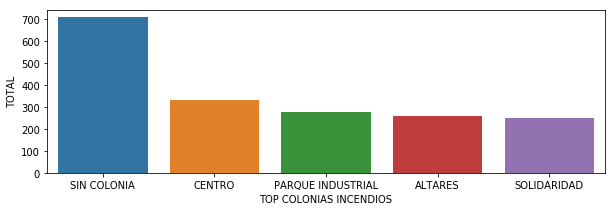

In [21]:
x = df_incendio_top.index
y = df_incendio_top.values

plt.figure(figsize=(10,3))
ax= sns.barplot(x,y)
ax.set(xlabel='TOP COLONIAS INCENDIOS', ylabel='TOTAL')

In [22]:
temp_ordenados = df_incendio_totales.sort_values(ascending=False)
temp_index = temp_ordenados[temp_ordenados.index!='SIN COLONIA'].head(10)
colonia_nombre = np.array(temp_index.index)
colonia_nombre

array(['CENTRO', 'PARQUE INDUSTRIAL', 'ALTARES', 'SOLIDARIDAD',
       'NUEVO HERMOSILLO', 'SAHUARO', 'PROYECTO RIO SONORA',
       'CARRETERA A KINO', '5 DE MAYO', 'LAS LOMAS'], dtype=object)

In [24]:
def get_position(col_serie,categories):
    temp_array = [list(categories).index(e) + 1 for e in col_serie]
    return np.array(temp_array)

temp_incendio_top_10 = df_incendio[df_incendio['COLONIA'].isin(colonia_nombre)].copy()

posicion = get_position(temp_incendio_top_10['COLONIA'], colonia_nombre)

temp_incendio_top_10['POSICION'] = posicion
temp_incendio_top_10


df_incendio_totales = temp_incendio_top_10.groupby(['POSICION','COLONIA','MES'])['COLONIA'].count()
df_incendio_totales

# df_incendio_totales = df_incendio.groupby(['COLONIA', 'MES'], as_index=False).count()
# df_incendio_totales.rename(columns={"FOLIO": "TOTAL"},inplace=True)
# df_incendio_totales[['COLONIA', 'MES', 'TOTAL']]

# temp = pd.MultiIndex.to_frame(df_incendio_totales.index,index=False)
# temp['TOTAL'] = df_incendio_totales.values
# temp

POSICION  COLONIA            MES
1         CENTRO             1      35
                             2      39
                             3      29
                             4      35
                             5      30
                             6      30
                             7      22
                             8      14
                             9      23
                             10     32
                             11     26
                             12     17
2         PARQUE INDUSTRIAL  1      28
                             2      24
                             3      28
                             4      19
                             5      60
                             6      18
                             7       6
                             8      19
                             9      11
                             10     28
                             11     20
                             12     13
3         ALTARES            1 

In [25]:
df_incendio_causa = df_incendio.groupby(['CAUSA'])['CAUSA'].count().copy()
df_incendio_causa = df_incendio_causa.sort_values(ascending=False).head()
df_incendio_causa.head()

CAUSA
FUEGO DIRECTO                  11626
CORTO CIRCUITO                   523
OTROS                            341
SOBRECALENTAMIENTO               200
INCENDIO DE ZACATE Y BASURA      150
Name: CAUSA, dtype: int64

[Text(0, 0.5, 'TOTAL'), Text(0.5, 0, 'TOP CAUSAS INCENDIOS')]

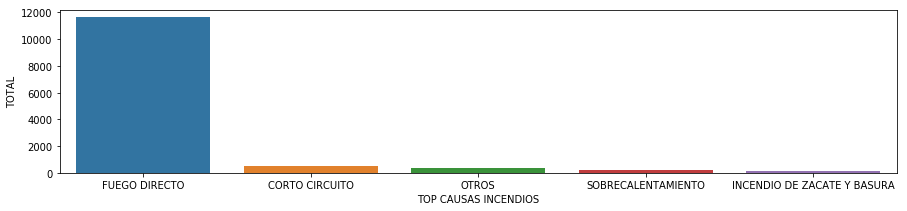

In [26]:
x = df_incendio_causa.index
y = df_incendio_causa.values

plt.figure(figsize=(15,3))
ax= sns.barplot(x,y)
ax.set(xlabel='TOP CAUSAS INCENDIOS', ylabel='TOTAL')

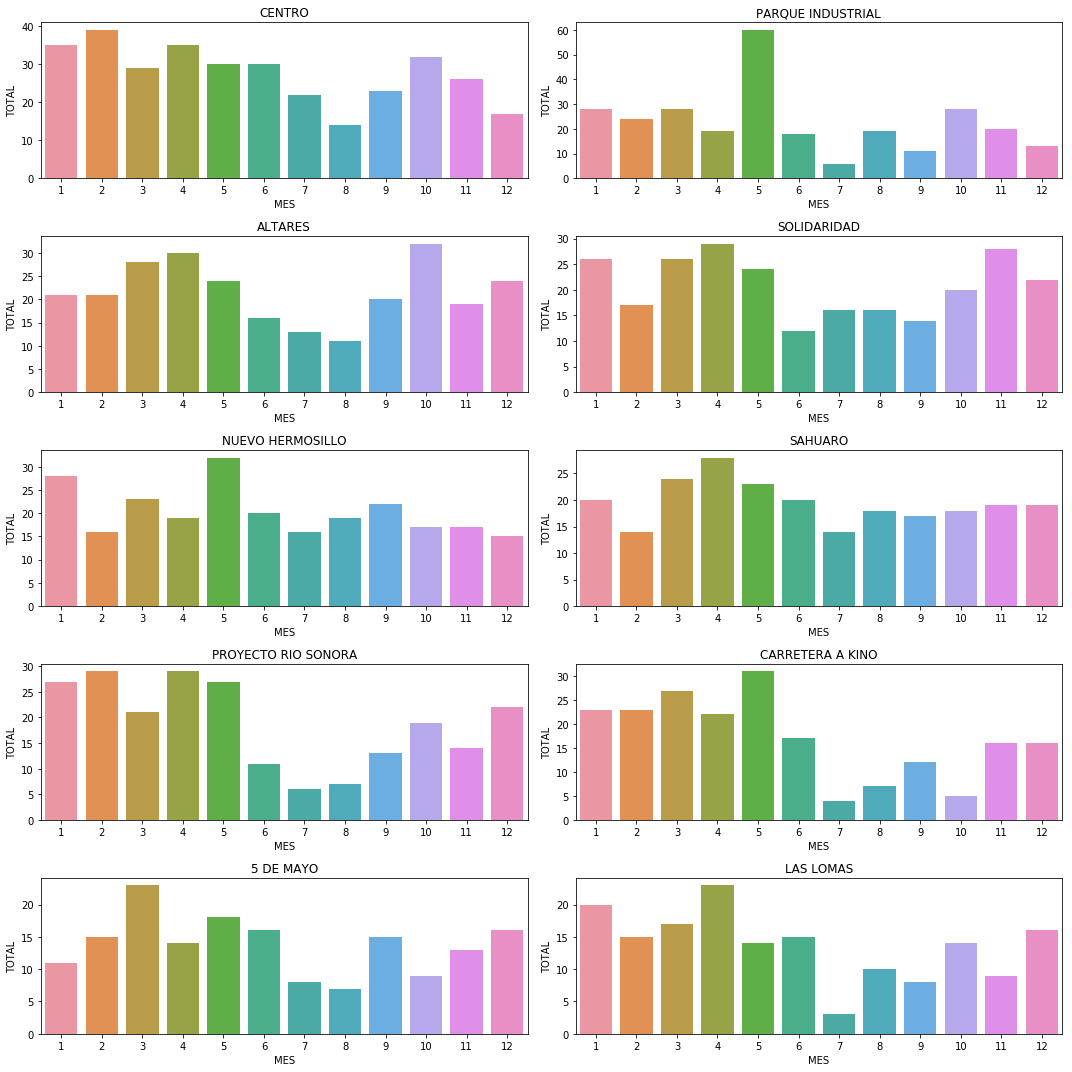

In [208]:
f, axes = plt.subplots(5, 2, figsize=(15, 15))

colonias = list(colonia_nombre)
colonias.reverse()
posicion_contador = 1

for r in range(5):
    for c in range(2):
        title = colonias.pop()
        x = df_incendio_totales.loc[(posicion_contador)].loc[(title)].index
        y = df_incendio_totales.loc[(posicion_contador)].loc[(title)].values
  
        ax = sns.barplot(x,y, ax=axes[r, c])
        ax.set(xlabel='MES', ylabel='TOTAL',title=title)
        
        posicion_contador+=1

f.tight_layout()

In [308]:
temp = (pd.DatetimeIndex(df2['LLEGADA']) - pd.DatetimeIndex(df2['SALIDA']))

In [336]:
temp[0], df2['LLEGADA'][0]

('01', '1/1/2016 0:16')

In [703]:
temp_a = df2['SALIDA'].apply(to_datetime_format)
# temp_b = df2['LLEGADA'].apply(to_datetime_format)

temp = datetime.datetime.now()

# help(temp)

# datetime.datetime.fromtimestamp(1563749035.736113)

# , 1563749196.421949
times = [1563749138.358699, 1563749112.493369, 1563749144.519458, 1563749151.948219, 1563749162.736264, 1563749174.898651]
times.sort()



temp = datetime.datetime.now()
temp.timestamp()

times_string = df2[df2['LLEGADA'].isna()!=True]['LLEGADA'].values
timestamps = list(map(lambda x: to_datetime_format(x).timestamp(),times_string))
median_string_datetime(timestamps)
  

1490199240.0 11435


datetime.datetime(2017, 3, 22, 9, 14)